In [1]:
%matplotlib inline


# Hierarchical Merging of Region Boundary RAGs


This example demonstrates how to perform hierarchical merging on region
boundary Region Adjacency Graphs (RAGs). Region boundary RAGs can be
constructed with the :py:func:`skimage.future.graph.rag_boundary` function.
The regions with the lowest edge weights are successively merged until there
is no edge with weight less than ``thresh``. The hierarchical merging is done
through the :py:func:`skimage.future.graph.merge_hierarchical` function.
For an example of how to construct region boundary based RAGs, see
:any:`plot_rag_boundary`.




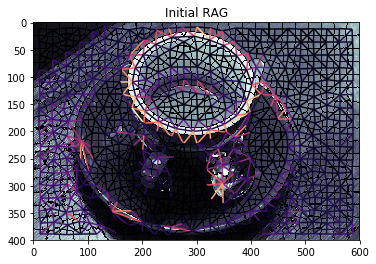

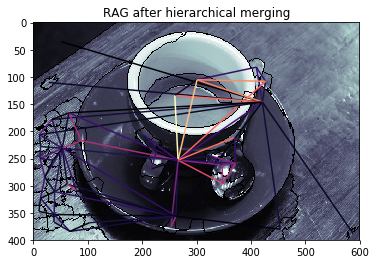

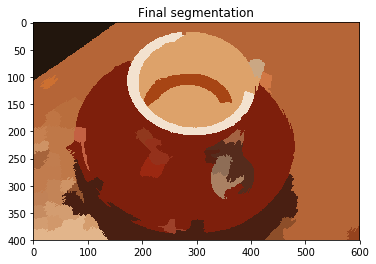

In [2]:
from skimage import data, segmentation, filters, color
from skimage.future import graph
from matplotlib import pyplot as plt


def weight_boundary(graph, src, dst, n):
    """
    Handle merging of nodes of a region boundary region adjacency graph.

    This function computes the `"weight"` and the count `"count"`
    attributes of the edge between `n` and the node formed after
    merging `src` and `dst`.


    Parameters
    ----------
    graph : RAG
        The graph under consideration.
    src, dst : int
        The vertices in `graph` to be merged.
    n : int
        A neighbor of `src` or `dst` or both.

    Returns
    -------
    data : dict
        A dictionary with the "weight" and "count" attributes to be
        assigned for the merged node.

    """
    default = {'weight': 0.0, 'count': 0}

    count_src = graph[src].get(n, default)['count']
    count_dst = graph[dst].get(n, default)['count']

    weight_src = graph[src].get(n, default)['weight']
    weight_dst = graph[dst].get(n, default)['weight']

    count = count_src + count_dst
    return {
        'count': count,
        'weight': (count_src * weight_src + count_dst * weight_dst)/count
    }


def merge_boundary(graph, src, dst):
    """Call back called before merging 2 nodes.

    In this case we don't need to do any computation here.
    """
    pass

img = data.coffee()
edges = filters.sobel(color.rgb2gray(img))
labels = segmentation.slic(img, compactness=30, n_segments=400)
g = graph.rag_boundary(labels, edges)

graph.show_rag(labels, g, img)
plt.title('Initial RAG')

labels2 = graph.merge_hierarchical(labels, g, thresh=0.08, rag_copy=False,
                                   in_place_merge=True,
                                   merge_func=merge_boundary,
                                   weight_func=weight_boundary)

graph.show_rag(labels, g, img)
plt.title('RAG after hierarchical merging')

plt.figure()
out = color.label2rgb(labels2, img, kind='avg')
plt.imshow(out)
plt.title('Final segmentation')

plt.show()